In [106]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import binom

# Exercise 2

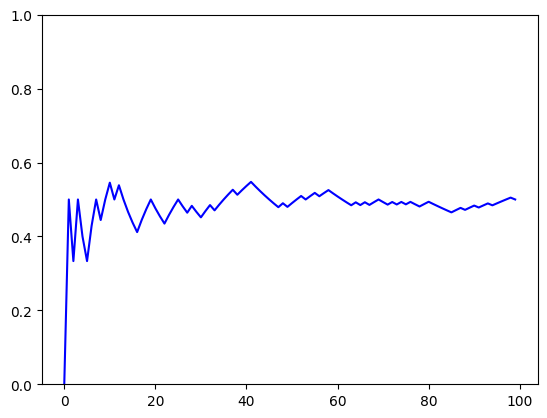

In [107]:
def toss():
    return random.randrange(0, 2)


omega = []
relative_freq = []
while len(relative_freq) < 100 or abs(relative_freq[-1] - 0.5) > 0.0001:
    omega.append(toss())
    head_p = omega.count(1) / len(omega)
    relative_freq.append(head_p)

df = pd.DataFrame(data=relative_freq, columns=['relFreq'])

plt.ylim(0, 1)
plt.plot(df, label='Relative Frequency', color='blue')

# Exercise 3
A manufacturing company produces small pumps that go into that they have estimated the rate of defect pumps to be 5%. per day.

a) What is the probability that exactly 5% of the pumps are defective on a production day?




In [108]:
import scipy

pumps_per_day = 20
defect_rate = 0.05
def_pumps = pumps_per_day * defect_rate


def binom_prob(k, n, p):
    return scipy.stats.binom.pmf(k, n, p)


prob = binom_prob(def_pumps, pumps_per_day, defect_rate)
print(f'The probability that exactly 5% of the pumps are defective on a production day is {prob}')

The probability that exactly 5% of the pumps are defective on a production day is 0.37735360253530753


<br>
b) Draw the probability mass function for the number of defective pumps per day with a bar plot.

The probabilty that exactly 6 pumps are defective is 0.0002953481592268432


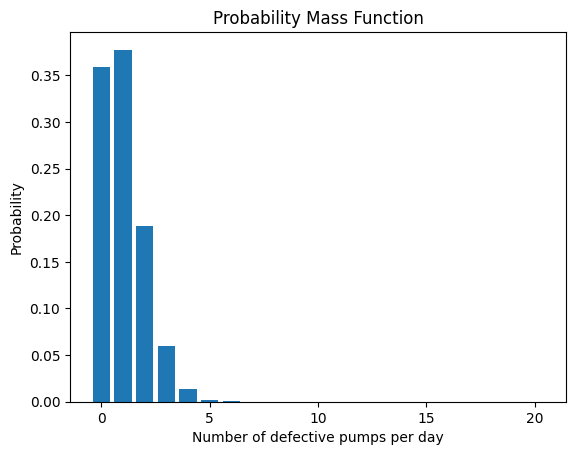

In [109]:
x = np.arange(0, pumps_per_day + 1)
y = [binom_prob(i, pumps_per_day, defect_rate) for i in x]
plt.bar(x, y)
plt.xlabel('Number of defective pumps per day')
plt.ylabel('Probability')
plt.title('Probability Mass Function')

print(f'The probabilty that exactly 6 pumps are defective is {y[6]}')

<br>
c) What is the probability that more than 3 pumps are defective on a production day? (use the cumulative distribution function!)


In [110]:
cummulated_probs = [sum(y[:i + 1]) for i in range(len(y))]
prob_more_than_3 = 1 - cummulated_probs[3]
print(f'The probability that more than 3 pumps are defective on a production day is {prob_more_than_3}')

The probability that more than 3 pumps are defective on a production day is 0.015901526019763468


<br>
d) On one day, 10 pumps are defective. What do you suspect happened?

In [111]:
prob_more_than_10 = 1 - cummulated_probs[10]
print(f'The probability that more than 10 pumps are defective on a production day is {prob_more_than_10}')

The probability that more than 10 pumps are defective on a production day is 5.379600098720516e-10


Answer: The probability is so low and is really unlikely. I would guess that the producing machine or process is not working correctly.

# Exercise 4

The **Poisson distribution** is a probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space, under the assumption that these events happen independently of each other and at a constant average rate.

### Probability Mass Function (PMF)

The Poisson distribution is characterized by the parameter $\lambda$, which represents the average number of events in the given interval. The probability mass function (PMF) is given by:

$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}
$
where:

- $X$ is the random variable representing the number of events.
- $k$ is a non-negative integer representing the number of events (i.e., $ k = 0, 1, 2, \ldots $)
- $\lambda > 0$ is the expected number of occurrences in the interval.
- $e$ is Euler's number, approximately 2.71828.
- $k!$ is the factorial of $k$.

### Key Properties

1. **Expected Value (Mean)**: The expected value of a Poisson-distributed random variable $X$ is equal to $\lambda$:

   E$[X] = \lambda$

2. **Variance**: The variance of $X$ is also equal to $\lambda$:

   $
   \text{Var}(X) = \lambda
    $
3. **Applications**: The Poisson distribution is used in scenarios where events occur independently and with a known average rate, such as:
   - The number of phone calls received by a call center per hour.
   - The number of emails a person receives in a day.
   - The number of accidents happening at a specific intersection per year.

The Poisson distribution is widely used for modeling rare or infrequent events in large populations or over time.

# Exercise 5

# Exercise 6
P(R | T) = 0.95

P(R | T') = 0.01

I would argue that with probability that 0.01 of the people are wrongly classified as terrorists, the False positives are quiet many, since there are many people travelling via Zurich Main station.


# Exercise 7

In [112]:
p_ch_prisoner = 0.29
p_non_ch_prisoner = 0.71
inhabitants = 8_740_000
p_ch = 0.73
inhabitants_ch = inhabitants * p_ch
inhabitants_non_ch = inhabitants_ch * (1 - p_ch)
n_prisoners = 6_400

p_prisoner = n_prisoners / inhabitants

# P(Prisoner|CH)
# Bayes Theorem -> P(CH|P) * P(P) / P(CH)
p_pris_CH = p_ch_prisoner * p_prisoner / p_ch
print(f'The probability that a Swiss person is in prison is {p_pris_CH * 100:.4f}%')

# P(P|NOT_CH)
# Bayes Theorem -> P(NOT_CH|P) * P(P) / P(NOT_CH)
p_pris_non_CH = p_non_ch_prisoner * p_prisoner / (1 - p_ch)
print(f'The probability that a non Swiss person is in prison is {p_pris_non_CH * 100:.4f}%')

The probability that a Swiss person is in prison is 0.0291%
The probability that a non Swiss person is in prison is 0.1926%


# Exercise 8


In [113]:
# For women over 40
# D: "Down syndrom is present"
# T: "Test is positive"
p_D = 0.014
p_nD = 1 - p_D
p_T_D = 0.992
p_nT_nD = 0.9991

# P(D|T) -> P(T|D) * P(D) / P(T)
# P(T) -> P(T|D) * P(D) + P(T|D') * P(D')

# False positive
p_T_nD = 1 - p_T_D

p_T = p_T_D * p_D + p_T_nD * p_nD
p_nT = 1 - p_T
p_D_T = p_T_D * p_D / p_T
print(f'Down syndrome is present and test positive {p_D_T*100:.3f}%')

p_D_nT = p_D * p_nT
print(f'Down syndrome is present and test is negative {p_D_nT*100:.3f}%')

Down syndrome is present and test positive 63.777%
Down syndrome is present and test is negative 1.370%


In [114]:
# For women at age 20
# D: "Down syndrom is present"
# T: "Test is positive"
p_D = 0.001
p_nD = 1 - p_D
p_T_D = 0.992
p_nT_nD = 0.9991

# P(D|T) -> P(T|D) * P(D) / P(T)
# P(T) -> P(T|D) * P(D) + P(T|D') * P(D')

# False positive
p_T_nD = 1 - p_T_D

p_T = p_T_D * p_D + p_T_nD * p_nD
p_nT = 1 - p_T
p_D_T = p_T_D * p_D / p_T
print(f'Down syndrome is present and test positive {p_D_T*100:.3f}%')

p_D_nT = p_D * p_nT
print(f'Down syndrome is present and test is negative {p_D_nT*100:.3f}%')

Down syndrome is present and test positive 11.042%
Down syndrome is present and test is negative 0.099%


The NIPT is usually not conducted for woman at age 20 becaues the total probability of having a fetus with the down syndrome is really low (0.1%).
The probabilty to catch a fetus with downsyndrom with a positive test is really low at 11%.

Text(0, 0.5, 'Probability having covid and test positive')

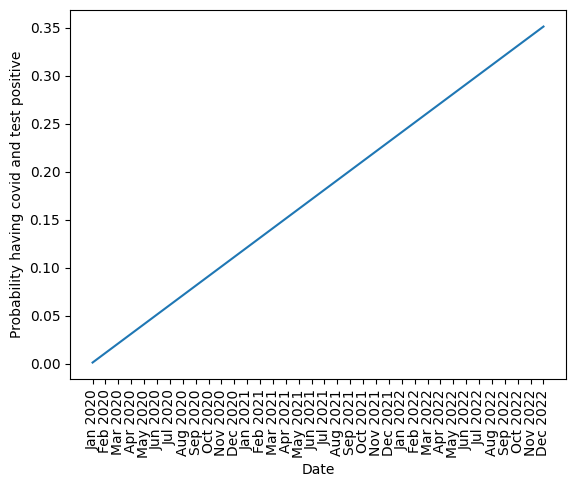

In [115]:
p_C_T = np.arange(0.001,0.36, 0.01)
dates = [f'{month} {year}' for year in range(2020, 2023) for month in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
    
plt.xticks(rotation=90)
plt.plot(dates,p_C_T)
plt.xlabel('Date')
plt.ylabel('Probability having covid and test positive')

# Exercise 9
Head: 0

Tail: 1

In [116]:
d = [0,0,1,1,1]

ratio = (binom.pmf(k=2, n=5, p=0.8) * 0.9) / (binom.pmf(k=2, n=5, p=0.2) * 0.1)
print(f'The ratio of the two probabilities is {ratio}')

The ratio of the two probabilities is 2.25


In [117]:
ratio_2 = (binom.pmf(k=20, n=50, p=0.8) * 0.9) / (binom.pmf(k=20, n=50, p=0.2) * 0.1)
print(f'The ratio of the two probabilities is {ratio_2}')

The ratio of the two probabilities is 8.58306884765616e-06


Argue why a frequentist magician would have failed at this task.

Because we wanted to predict how  

# Exercise 10


In [118]:
covid_csv = pd.read_csv('covid_tests.csv')
covid_csv

C:\Users\Dave\AppData\Local\Temp\ipykernel_12296\660101978.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  covid_csv = pd.read_csv('covid_tests.csv')


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
1,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
2,2020-04-30,0.0,1.0,0.0,0.0,0.0,negative,NaN,male,Other
3,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
4,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other
...,...,...,...,...,...,...,...,...,...,...
278843,2020-03-11,0.0,0.0,0.0,0.0,0.0,negative,NaN,NaN,Other
278844,2020-03-11,0.0,0.0,0.0,0.0,0.0,negative,NaN,NaN,Other
278845,2020-03-11,0.0,0.0,0.0,0.0,0.0,positive,NaN,NaN,Contact with confirmed
278846,2020-03-11,0.0,0.0,0.0,0.0,0.0,other,NaN,NaN,Other


In [119]:
data = covid_csv[['corona_result','cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache']]
data

,corona_result,cough,fever,sore_throat,shortness_of_breath,head_ache
0,negative,0.0,0.0,0.0,0.0,0.0
1,negative,1.0,0.0,0.0,0.0,0.0
2,negative,0.0,1.0,0.0,0.0,0.0
3,negative,1.0,0.0,0.0,0.0,0.0
4,negative,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
278843,negative,0.0,0.0,0.0,0.0,0.0
278844,negative,0.0,0.0,0.0,0.0,0.0
278845,positive,0.0,0.0,0.0,0.0,0.0
278846,other,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='corona_result'>

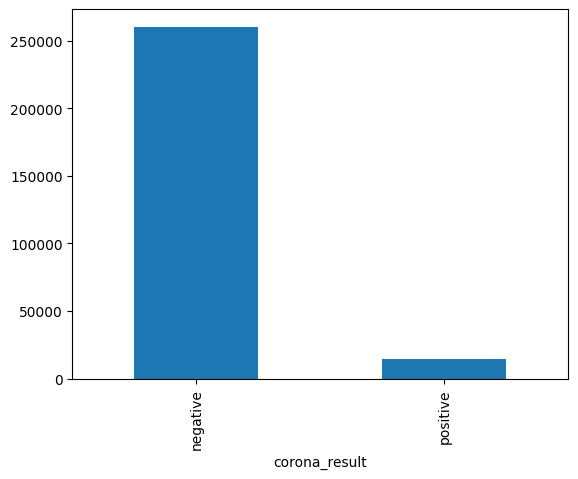

In [120]:
data['corona_result'].value_counts()
data['corona_result'].value_counts().drop('other').plot(kind='bar')

In [121]:
data.loc[:, 'corona_result'] = data['corona_result'].map({'negative': 0, 'positive': 1})
data

,corona_result,cough,fever,sore_throat,shortness_of_breath,head_ache
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
278843,0.0,0.0,0.0,0.0,0.0,0.0
278844,0.0,0.0,0.0,0.0,0.0,0.0
278845,1.0,0.0,0.0,0.0,0.0,0.0
278846,NaN,0.0,0.0,0.0,0.0,0.0
